In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/marketing-strategy-personalised-offer/sample.csv
/kaggle/input/marketing-strategy-personalised-offer/train_data.csv
/kaggle/input/marketing-strategy-personalised-offer/test_data.csv


READING TRAIN DATA FORM THE SOURCE PROVIDED

In [2]:
train_data = pd.read_csv("/kaggle/input/marketing-strategy-personalised-offer/train_data.csv")

In [3]:
train_data.head()

,offer expiration,income_range,no_visited_Cold drinks,travelled_more_than_15mins_for_offer,Restaur_spend_less_than20,Marital Status,restaurant type,age,Prefer western over chinese,travelled_more_than_25mins_for_offer,...,restuarant_opposite_direction_house,has Children,visit restaurant with rating (avg),temperature,Restaur_spend_greater_than20,Travel Time,Climate,drop location,Prefer home food,Offer Accepted
0,2days,₹100000 or More,4~8,1,less1,Married partner,4 star restaurant,36,0,0,...,0,0,4,67,less1,22,Spring,Location B,0,No
1,2days,₹87500 - ₹99999,4~8,0,4~8,Married partner,Take-away restaurant,50plus,0,0,...,0,1,3,89,1~3,18,Summer,Location B,0,Yes
2,2days,₹87500 - ₹99999,less1,1,1~3,Single,Cold drinks,26,1,0,...,1,1,4,67,less1,7,Winter,Location A,1,Yes
3,10hours,₹37500 - ₹49999,less1,0,1~3,Single,Take-away restaurant,46,1,0,...,0,1,3,89,1~3,7,Summer,Location C,0,No
4,2days,₹100000 or More,never,1,1~3,Single,4 star restaurant,21,0,1,...,1,0,3,40,less1,7,Summer,Location C,0,No


SPLITING OF DATA INTO FEATURES (X) AND LABEL (Y)

In [4]:
X = train_data.iloc[:,:-1]
y = train_data.iloc[:,-1]

In [5]:
X.head()

,offer expiration,income_range,no_visited_Cold drinks,travelled_more_than_15mins_for_offer,Restaur_spend_less_than20,Marital Status,restaurant type,age,Prefer western over chinese,travelled_more_than_25mins_for_offer,...,Job/Job Industry,restuarant_opposite_direction_house,has Children,visit restaurant with rating (avg),temperature,Restaur_spend_greater_than20,Travel Time,Climate,drop location,Prefer home food
0,2days,₹100000 or More,4~8,1,less1,Married partner,4 star restaurant,36,0,0,...,Unemployed,0,0,4,67,less1,22,Spring,Location B,0
1,2days,₹87500 - ₹99999,4~8,0,4~8,Married partner,Take-away restaurant,50plus,0,0,...,Unemployed,0,1,3,89,1~3,18,Summer,Location B,0
2,2days,₹87500 - ₹99999,less1,1,1~3,Single,Cold drinks,26,1,0,...,Arts Design Entertainment Sports & Media,1,1,4,67,less1,7,Winter,Location A,1
3,10hours,₹37500 - ₹49999,less1,0,1~3,Single,Take-away restaurant,46,1,0,...,Sales & Related,0,1,3,89,1~3,7,Summer,Location C,0
4,2days,₹100000 or More,never,1,1~3,Single,4 star restaurant,21,0,1,...,Sales & Related,1,0,3,40,less1,7,Summer,Location C,0


In [6]:
y.head()

0     No
1    Yes
2    Yes
3     No
4     No
Name: Offer Accepted, dtype: object

FINDING NULL VALUES IF ANY

In [7]:
X.isnull().sum()

offer expiration                            0
income_range                                0
no_visited_Cold drinks                    198
travelled_more_than_15mins_for_offer        0
Restaur_spend_less_than20                 121
Marital Status                              0
restaurant type                             0
age                                         0
Prefer western over chinese                 0
travelled_more_than_25mins_for_offer        0
travelled_more_than_5mins_for_offer         0
no_visited_bars                            93
gender                                      0
car                                     12268
restuarant_same_direction_house             0
Cooks regularly                             0
Customer type                               0
Qualification                               0
is foodie                                   0
no_Take-aways                             144
Job/Job Industry                            0
restuarant_opposite_direction_hous

INFORMATION ABOUT FEATURES LIKE COUNT AND DATA TYPE

In [8]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12379 entries, 0 to 12378
Data columns (total 30 columns):
 #   Column                                Non-Null Count  Dtype 
---  ------                                --------------  ----- 
 0   offer expiration                      12379 non-null  object
 1   income_range                          12379 non-null  object
 2   no_visited_Cold drinks                12181 non-null  object
 3   travelled_more_than_15mins_for_offer  12379 non-null  int64 
 4   Restaur_spend_less_than20             12258 non-null  object
 5   Marital Status                        12379 non-null  object
 6   restaurant type                       12379 non-null  object
 7   age                                   12379 non-null  object
 8   Prefer western over chinese           12379 non-null  int64 
 9   travelled_more_than_25mins_for_offer  12379 non-null  int64 
 10  travelled_more_than_5mins_for_offer   12379 non-null  int64 
 11  no_visited_bars             

FINDING NUMBER UNIQUE VALUES AND DATA TYPE FOR EACH FEATURES 

In [9]:
for col in X.columns:
    print(col ,':',len(X[col].unique()),'Labels','&  Datatype : ',X[col].dtype)

offer expiration : 2 Labels &  Datatype :  object
income_range : 9 Labels &  Datatype :  object
no_visited_Cold drinks : 6 Labels &  Datatype :  object
travelled_more_than_15mins_for_offer : 2 Labels &  Datatype :  int64
Restaur_spend_less_than20 : 6 Labels &  Datatype :  object
Marital Status : 5 Labels &  Datatype :  object
restaurant type : 5 Labels &  Datatype :  object
age : 8 Labels &  Datatype :  object
Prefer western over chinese : 2 Labels &  Datatype :  int64
travelled_more_than_25mins_for_offer : 2 Labels &  Datatype :  int64
travelled_more_than_5mins_for_offer : 1 Labels &  Datatype :  int64
no_visited_bars : 6 Labels &  Datatype :  object
gender : 2 Labels &  Datatype :  object
car : 6 Labels &  Datatype :  object
restuarant_same_direction_house : 2 Labels &  Datatype :  int64
Cooks regularly : 2 Labels &  Datatype :  int64
Customer type : 4 Labels &  Datatype :  object
Qualification : 6 Labels &  Datatype :  object
is foodie : 2 Labels &  Datatype :  int64
no_Take-aways :

FINDING UNIQUE VALUES FOR EACH FEATURES 

In [10]:
for col in X.columns:
    print(col ,':', X[col].unique())

offer expiration : ['2days' '10hours']
income_range : ['₹100000 or More' '₹87500 - ₹99999' '₹37500 - ₹49999' 'Less than ₹12500'
 '₹50000 - ₹62499' '₹12500 - ₹24999' '₹75000 - ₹87499' '₹25000 - ₹37499'
 '₹62500 - ₹74999']
no_visited_Cold drinks : ['4~8' 'less1' 'never' '1~3' 'gt8' nan]
travelled_more_than_15mins_for_offer : [1 0]
Restaur_spend_less_than20 : ['less1' '4~8' '1~3' 'gt8' 'never' nan]
Marital Status : ['Married partner' 'Single' 'Divorced' 'Unmarried partner' 'Widowed']
restaurant type : ['4 star restaurant' 'Take-away restaurant' 'Cold drinks'
 'Restaurant with pub' '2 star restaurant']
age : ['36' '50plus' '26' '46' '21' 'below21' '41' '31']
Prefer western over chinese : [0 1]
travelled_more_than_25mins_for_offer : [0 1]
travelled_more_than_5mins_for_offer : [1]
no_visited_bars : ['less1' 'never' '1~3' nan '4~8' 'gt8']
gender : ['Female' 'Male']
car : [nan 'Mazda5' 'Car that is too old to install Onstar :D' 'crossover'
 'Scooter and motorcycle' 'do not drive']
restuarant_s

GENERATING HEAT MAP TO SEE THE COR RELATION BETWEEN EACH FAETURES

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

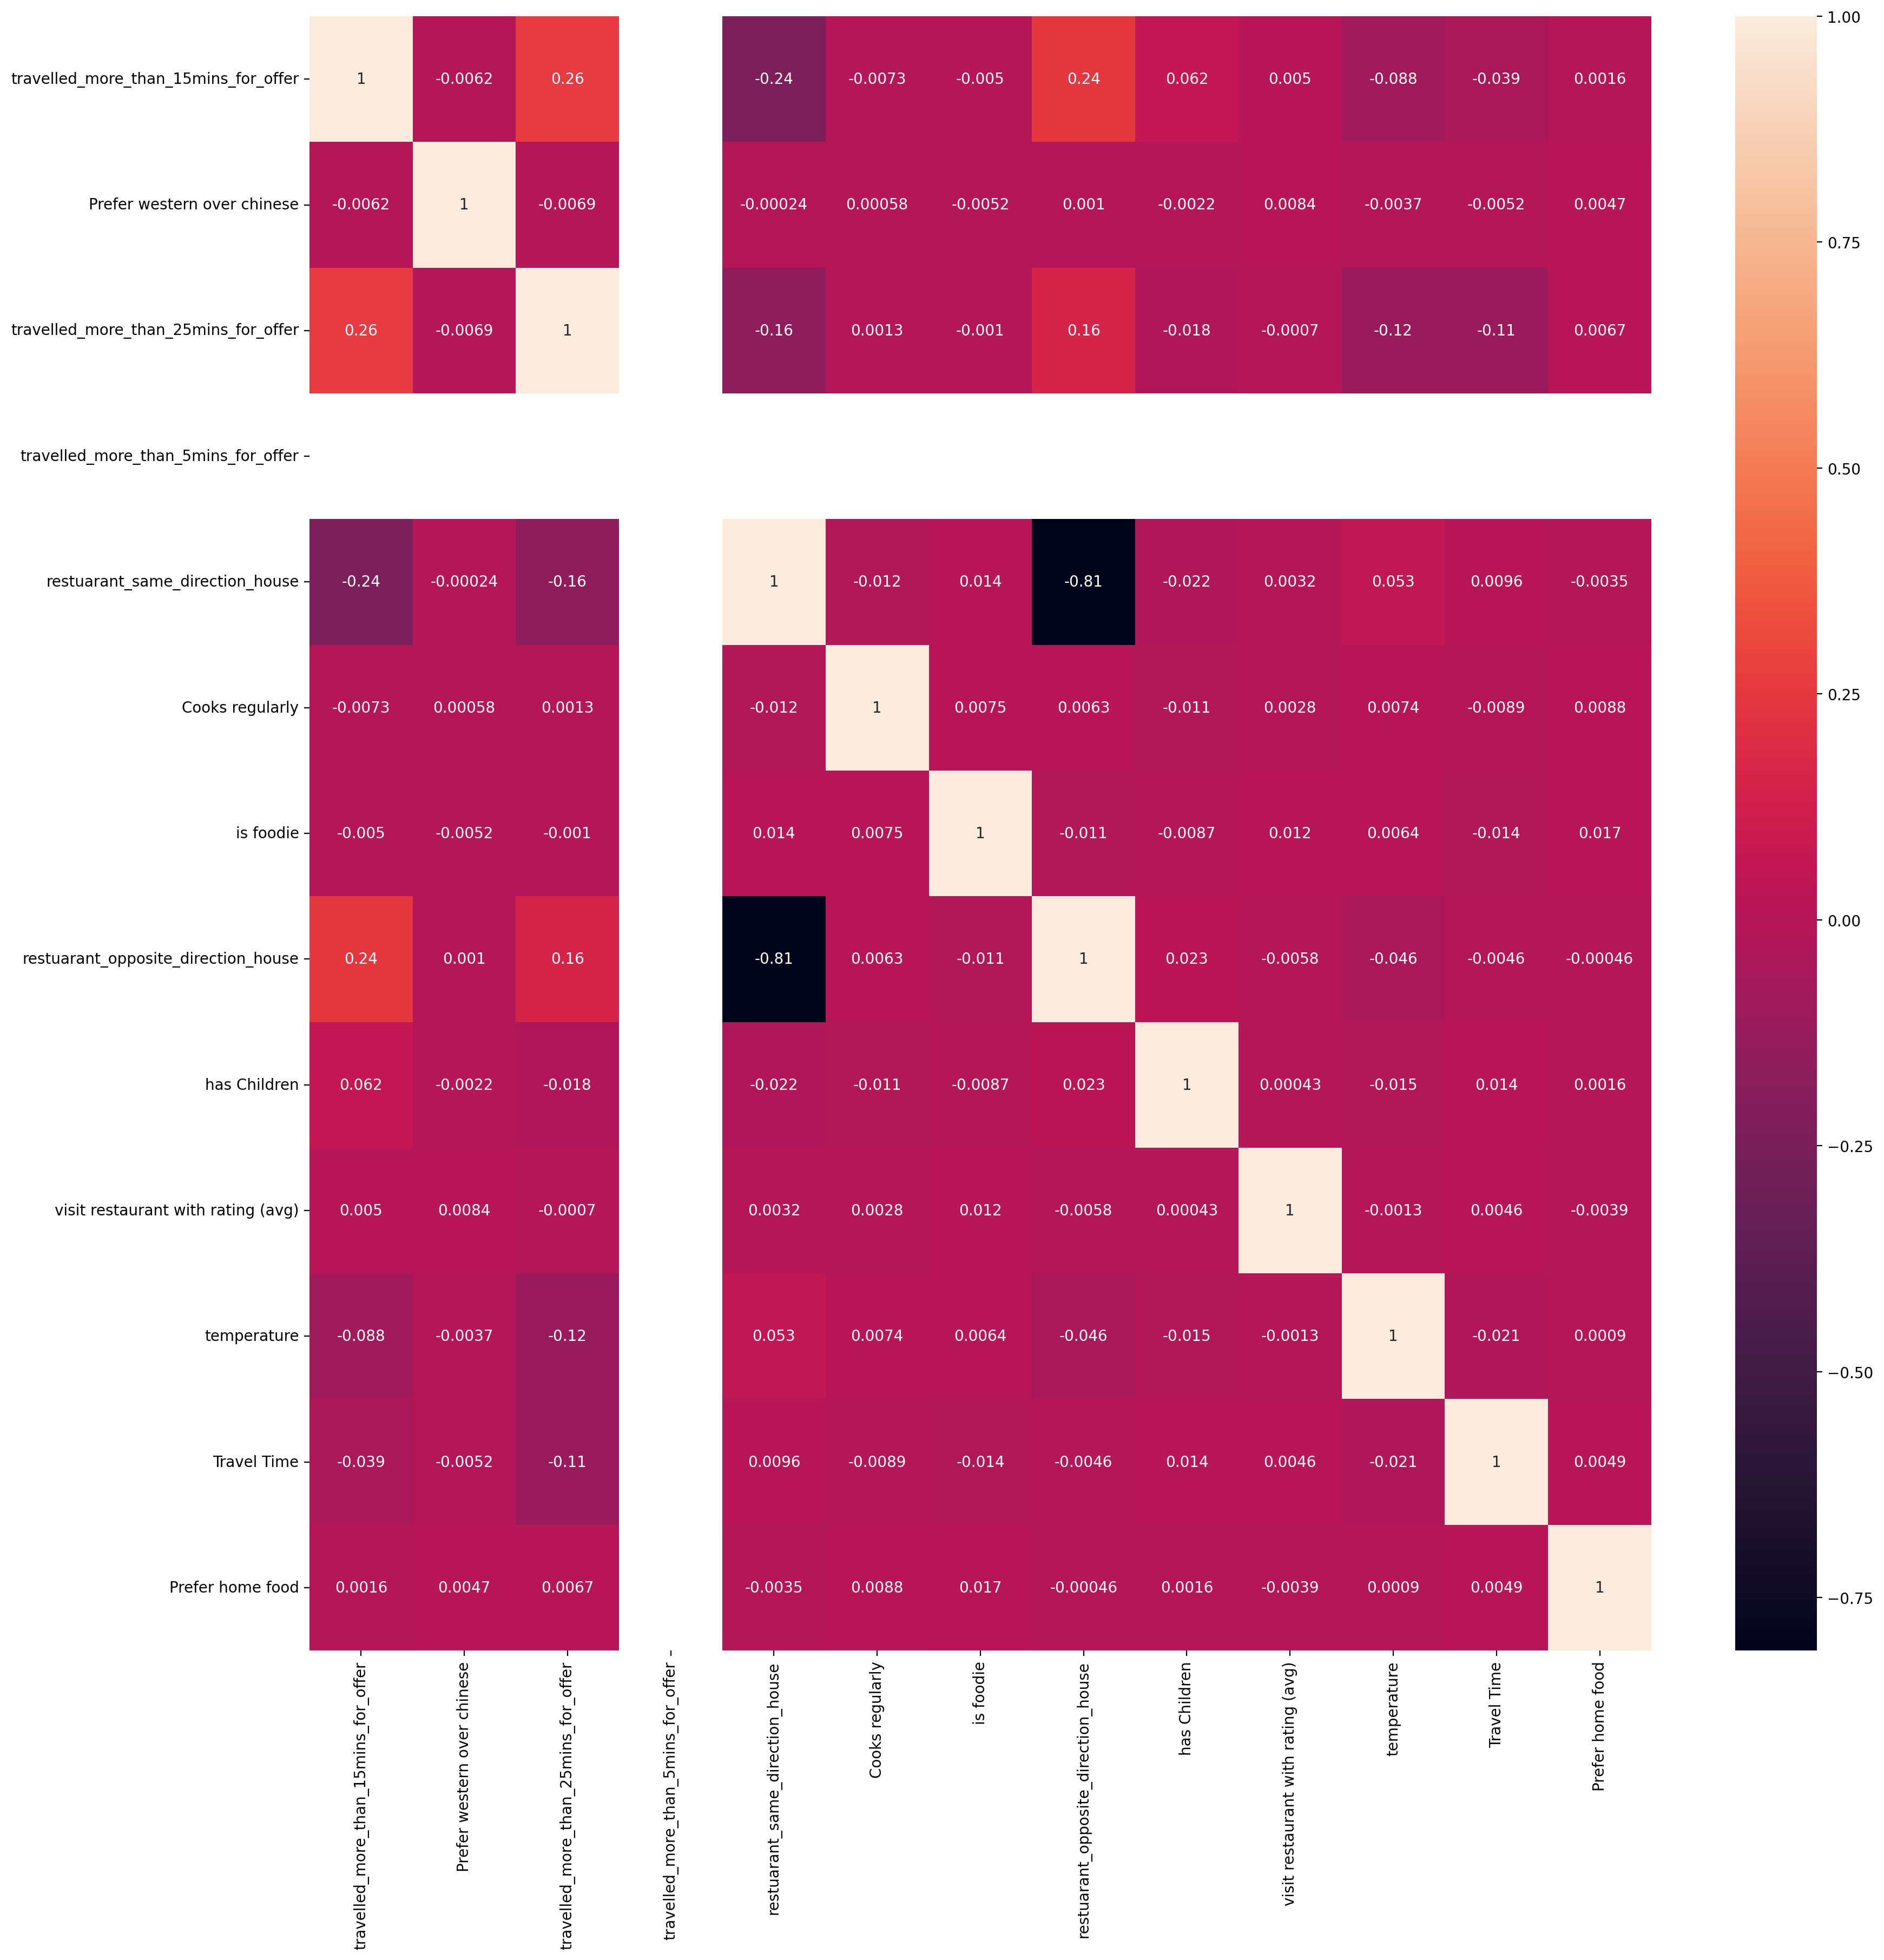

In [12]:
corrmat = X.corr()
plt.figure(figsize=(20,20),dpi = 200)
g=sns.heatmap(X.corr(),annot=True)

NAMES OF FEATURES 

In [13]:
X.columns

Index(['offer expiration', 'income_range', 'no_visited_Cold drinks',
       'travelled_more_than_15mins_for_offer', 'Restaur_spend_less_than20',
       'Marital Status', 'restaurant type', 'age',
       'Prefer western over chinese', 'travelled_more_than_25mins_for_offer',
       'travelled_more_than_5mins_for_offer', 'no_visited_bars', 'gender',
       'car', 'restuarant_same_direction_house', 'Cooks regularly',
       'Customer type', 'Qualification', 'is foodie', 'no_Take-aways',
       'Job/Job Industry', 'restuarant_opposite_direction_house',
       'has Children', 'visit restaurant with rating (avg)', 'temperature',
       'Restaur_spend_greater_than20', 'Travel Time', 'Climate',
       'drop location', 'Prefer home food'],
      dtype='object')

LIST OF CATEGORICAL FEATRURE TO BE CONVERT INTO NUMERICAL VALUES 

In [14]:
columns_list = ['offer expiration', 'income_range', 'no_visited_Cold drinks',
                'Restaur_spend_less_than20',
                'Marital Status', 'restaurant type', 'age',
                'no_visited_bars', 'gender',
                'car','Customer type', 'Qualification', 'no_Take-aways',
                'Job/Job Industry', 'Restaur_spend_greater_than20', 'Travel Time', 'Climate',
                'drop location']

LIST OF CATEGORICAL FEATURES FOR 

1. ONE HOT CODING
2. LABEL ENCODING 

In [15]:
onehotcoding_list = ['no_visited_Cold drinks','Restaur_spend_less_than20','no_visited_bars',
                'car', 'no_Take-aways','Restaur_spend_greater_than20']

In [16]:
labelencoding_list = ['offer expiration', 'income_range','Marital Status', 'restaurant type', 'age',
                     'gender','Customer type', 'Qualification','Job/Job Industry', 'Climate',
                'drop location']

ONE HOT ENCODING TO onehotcoding_list

In [17]:
X = pd.get_dummies(data=X,columns = onehotcoding_list,dummy_na=True)
X.shape

(12379, 60)

In [18]:
#from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler,LabelEncoder 
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn import set_config
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV

LABEL ENCODING TO labelencoding_list 

In [19]:
enc = LabelEncoder()
X[labelencoding_list] = X[labelencoding_list].apply(enc.fit_transform)
X.shape

(12379, 60)

APPLYING ALL PREPROCESSING ,PCA , AND TRAINING THE MODEL USING COLUMN TRAONSFORMERS AND PIPELINE 

In [20]:
#1rd Scaling
trf1 = ColumnTransformer([
    ('scaler', StandardScaler(), [0,1,5,6,7,12,16,17,20,27,28,23,24,26])
],remainder='passthrough')
# 3th model training by 
trf2 = RandomForestClassifier()


In [21]:
pipe = Pipeline([
    ('trf1', trf1),
    ('trf2', trf2),
    ])

In [22]:
set_config(display='diagram')
pipe

Pipeline(steps=[('trf1',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('scaler', StandardScaler(),
                                                  [0, 1, 5, 6, 7, 12, 16, 17,
                                                   20, 27, 28, 23, 24, 26])])),
                ('trf2', RandomForestClassifier())])

Hyerparametor tuning using RandomizedSearchCV

In [23]:
param_grid = [ 
    {'trf2' : [RandomForestClassifier()],
     'trf2__n_estimators' : [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000],
    'trf2__max_depth' : [10, 100, 200, 300, 400, 500, 600, 700, 800, 1000],
    'trf2__min_samples_leaf' : [1,2,4,6,8],
    'trf2__min_samples_split' : [2,5,10,15],
     'trf2__criterion' : ['entropy','gini'],
     'trf2__max_features': ['auto','sqrt','log2']
      
    }
]

In [24]:
rf_randomcv=RandomizedSearchCV(estimator=pipe,param_distributions=param_grid,n_iter=200,cv=3,verbose=2,
                               random_state=100,n_jobs=-1)

rf_randomcv.fit(X,y)

Fitting 3 folds for each of 200 candidates, totalling 600 fits
[CV] END trf2=RandomForestClassifier(), trf2__criterion=gini, trf2__max_depth=700, trf2__max_features=auto, trf2__min_samples_leaf=4, trf2__min_samples_split=2, trf2__n_estimators=600; total time=   8.0s
[CV] END trf2=RandomForestClassifier(), trf2__criterion=gini, trf2__max_depth=700, trf2__max_features=auto, trf2__min_samples_leaf=4, trf2__min_samples_split=2, trf2__n_estimators=600; total time=   8.0s
[CV] END trf2=RandomForestClassifier(), trf2__criterion=entropy, trf2__max_depth=500, trf2__max_features=sqrt, trf2__min_samples_leaf=6, trf2__min_samples_split=15, trf2__n_estimators=1200; total time=  15.7s
[CV] END trf2=RandomForestClassifier(), trf2__criterion=entropy, trf2__max_depth=100, trf2__max_features=sqrt, trf2__min_samples_leaf=4, trf2__min_samples_split=10, trf2__n_estimators=1600; total time=  21.1s
[CV] END trf2=RandomForestClassifier(), trf2__criterion=entropy, trf2__max_depth=100, trf2__max_features=sqrt, 

/opt/conda/lib/python3.7/site-packages/joblib/externals/loky/process_executor.py:691: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning


[CV] END trf2=RandomForestClassifier(), trf2__criterion=gini, trf2__max_depth=700, trf2__max_features=auto, trf2__min_samples_leaf=4, trf2__min_samples_split=2, trf2__n_estimators=600; total time=   7.9s
[CV] END trf2=RandomForestClassifier(), trf2__criterion=entropy, trf2__max_depth=500, trf2__max_features=sqrt, trf2__min_samples_leaf=6, trf2__min_samples_split=15, trf2__n_estimators=1200; total time=  15.5s
[CV] END trf2=RandomForestClassifier(), trf2__criterion=entropy, trf2__max_depth=500, trf2__max_features=sqrt, trf2__min_samples_leaf=6, trf2__min_samples_split=15, trf2__n_estimators=1200; total time=  15.0s
[CV] END trf2=RandomForestClassifier(), trf2__criterion=entropy, trf2__max_depth=100, trf2__max_features=sqrt, trf2__min_samples_leaf=4, trf2__min_samples_split=10, trf2__n_estimators=1600; total time=  21.9s
[CV] END trf2=RandomForestClassifier(), trf2__criterion=gini, trf2__max_depth=300, trf2__max_features=auto, trf2__min_samples_leaf=4, trf2__min_samples_split=2, trf2__n_

RandomizedSearchCV(cv=3,
                   estimator=Pipeline(steps=[('trf1',
                                              ColumnTransformer(remainder='passthrough',
                                                                transformers=[('scaler',
                                                                               StandardScaler(),
                                                                               [0,
                                                                                1,
                                                                                5,
                                                                                6,
                                                                                7,
                                                                                12,
                                                                                16,
                                                                                17,
                                                                                20,
                                                                                27,
                                                                                28,
                                                                                23,
                                                                                24,
                                                                                26])])),
                                             ('trf2',
                                              RandomForestClassifier())]),
                   n_iter=200, n_jobs=-1,
                   param_distributions=[{'trf2': [RandomForestClassifier(criterion='entropy',
                                                                         max_depth=200,
                                                                         min_samples_leaf=2,
                                                                         n_estimators=1800)],
                                         'trf2__criterion': ['entropy', 'gini'],
                                         'trf2__max_depth': [10, 100, 200, 300,
                                                             400, 500, 600, 700,
                                                             800, 1000],
                                         'trf2__max_features': ['auto', 'sqrt',
                                                                'log2'],
                                         'trf2__min_samples_leaf': [1, 2, 4, 6,
                                                                    8],
                                         'trf2__min_samples_split': [2, 5, 10,
                                                                     15],
                                         'trf2__n_estimators': [200, 400, 600,
                                                                800, 1000, 1200,
                                                                1400, 1600,
                                                                1800, 2000]}],
                   random_state=100, verbose=2)

In [25]:
rf_randomcv.best_params_

{'trf2__n_estimators': 1800,
 'trf2__min_samples_split': 2,
 'trf2__min_samples_leaf': 2,
 'trf2__max_features': 'auto',
 'trf2__max_depth': 200,
 'trf2__criterion': 'entropy',
 'trf2': RandomForestClassifier(criterion='entropy', max_depth=200, min_samples_leaf=2,
                        n_estimators=1800)}

In [26]:
rf_randomcv

RandomizedSearchCV(cv=3,
                   estimator=Pipeline(steps=[('trf1',
                                              ColumnTransformer(remainder='passthrough',
                                                                transformers=[('scaler',
                                                                               StandardScaler(),
                                                                               [0,
                                                                                1,
                                                                                5,
                                                                                6,
                                                                                7,
                                                                                12,
                                                                                16,
                                                                                17,
                                                                                20,
                                                                                27,
                                                                                28,
                                                                                23,
                                                                                24,
                                                                                26])])),
                                             ('trf2',
                                              RandomForestClassifier())]),
                   n_iter=200, n_jobs=-1,
                   param_distributions=[{'trf2': [RandomForestClassifier(criterion='entropy',
                                                                         max_depth=200,
                                                                         min_samples_leaf=2,
                                                                         n_estimators=1800)],
                                         'trf2__criterion': ['entropy', 'gini'],
                                         'trf2__max_depth': [10, 100, 200, 300,
                                                             400, 500, 600, 700,
                                                             800, 1000],
                                         'trf2__max_features': ['auto', 'sqrt',
                                                                'log2'],
                                         'trf2__min_samples_leaf': [1, 2, 4, 6,
                                                                    8],
                                         'trf2__min_samples_split': [2, 5, 10,
                                                                     15],
                                         'trf2__n_estimators': [200, 400, 600,
                                                                800, 1000, 1200,
                                                                1400, 1600,
                                                                1800, 2000]}],
                   random_state=100, verbose=2)

In [27]:
param_grid1 = {'trf2' : [RandomForestClassifier()],
    'trf2__criterion': [rf_randomcv.best_params_['trf2__criterion']],
    'trf2__max_depth': [rf_randomcv.best_params_['trf2__max_depth']],
    'trf2__max_features': [rf_randomcv.best_params_['trf2__max_features']],
    'trf2__min_samples_leaf': [rf_randomcv.best_params_['trf2__min_samples_leaf'], 
                         rf_randomcv.best_params_['trf2__min_samples_leaf']+2, 
                         rf_randomcv.best_params_['trf2__min_samples_leaf'] + 4],
    'trf2__min_samples_split': [rf_randomcv.best_params_['trf2__min_samples_split'] - 2,
                          rf_randomcv.best_params_['trf2__min_samples_split'] - 1,
                          rf_randomcv.best_params_['trf2__min_samples_split'], 
                          rf_randomcv.best_params_['trf2__min_samples_split'] +1,
                          rf_randomcv.best_params_['trf2__min_samples_split'] + 2],
    'trf2__n_estimators': [rf_randomcv.best_params_['trf2__n_estimators'] - 200, rf_randomcv.best_params_['trf2__n_estimators'] - 100, 
                     rf_randomcv.best_params_['trf2__n_estimators'], 
                     rf_randomcv.best_params_['trf2__n_estimators'] + 100, rf_randomcv.best_params_['trf2__n_estimators'] + 200]
}

print(param_grid1)

{'trf2': [RandomForestClassifier()], 'trf2__criterion': ['entropy'], 'trf2__max_depth': [200], 'trf2__max_features': ['auto'], 'trf2__min_samples_leaf': [2, 4, 6], 'trf2__min_samples_split': [0, 1, 2, 3, 4], 'trf2__n_estimators': [1600, 1700, 1800, 1900, 2000]}


Hyerparametor tuning using GridSearchCV

In [28]:
#### Fit the grid_search to the data

grid_search=GridSearchCV(estimator=pipe,param_grid=param_grid1,cv=10,n_jobs=-1,verbose=2)
grid_search.fit(X,y)

Fitting 10 folds for each of 75 candidates, totalling 750 fits

[CV] END trf2=RandomForestClassifier(), trf2__criterion=entropy, trf2__max_depth=700, trf2__max_features=log2, trf2__min_samples_leaf=2, trf2__min_samples_split=10, trf2__n_estimators=600; total time=   7.0s
[CV] END trf2=RandomForestClassifier(), trf2__criterion=entropy, trf2__max_depth=400, trf2__max_features=sqrt, trf2__min_samples_leaf=8, trf2__min_samples_split=5, trf2__n_estimators=1200; total time=  14.8s
[CV] END trf2=RandomForestClassifier(), trf2__criterion=gini, trf2__max_depth=200, trf2__max_features=sqrt, trf2__min_samples_leaf=8, trf2__min_samples_split=2, trf2__n_estimators=1000; total time=  11.3s
[CV] END trf2=RandomForestClassifier(), trf2__criterion=gini, trf2__max_depth=200, trf2__max_features=sqrt, trf2__min_samples_leaf=8, trf2__min_samples_split=2, trf2__n_estimators=1000; total time=  11.8s
[CV] END trf2=RandomForestClassifier(), trf2__criterion=entropy, trf2__max_depth=800, trf2__max_features=log2,

/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
300 fits failed out of a total of 750.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
150 fits failed with the following error:
Traceback (most recent call last):
  File "/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/conda/lib/python3.7/site-packages/sklearn/pipeline.py", line 394, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py", line 467, in fit
    for i, t in enumerate(trees)
  File "/opt/conda/lib/python3.7/site-pac

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('trf1',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('scaler',
                                                                         StandardScaler(),
                                                                         [0, 1,
                                                                          5, 6,
                                                                          7, 12,
                                                                          16,
                                                                          17,
                                                                          20,
                                                                          27,
                                                                          28,
                                                                          23,
                                                                          24,
                                                                          26])])),
                                       ('trf2', RandomForestClassifier())]),
             n_jobs=-1,
             param_grid={'trf2': [RandomForestClassifier(criterion='entropy',
                                                         max_depth=200,
                                                         min_samples_leaf=2,
                                                         min_samples_split=4,
                                                         n_estimators=1800)],
                         'trf2__criterion': ['entropy'],
                         'trf2__max_depth': [200],
                         'trf2__max_features': ['auto'],
                         'trf2__min_samples_leaf': [2, 4, 6],
                         'trf2__min_samples_split': [0, 1, 2, 3, 4],
                         'trf2__n_estimators': [1600, 1700, 1800, 1900, 2000]},
             verbose=2)

In [29]:
grid_search.best_estimator_

Pipeline(steps=[('trf1',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('scaler', StandardScaler(),
                                                  [0, 1, 5, 6, 7, 12, 16, 17,
                                                   20, 27, 28, 23, 24, 26])])),
                ('trf2',
                 RandomForestClassifier(criterion='entropy', max_depth=200,
                                        min_samples_leaf=2, min_samples_split=4,
                                        n_estimators=1800))])

In [30]:
best_grid = grid_search.best_estimator_

#  READING TEST DATA AND APPLY THE MODEL FOR PREDICTION 

In [31]:
test_data = pd.read_csv('/kaggle/input/marketing-strategy-personalised-offer/test_data.csv')

In [32]:
test_data.head()

,offer expiration,income_range,no_visited_Cold drinks,travelled_more_than_15mins_for_offer,Restaur_spend_less_than20,Marital Status,restaurant type,age,Prefer western over chinese,travelled_more_than_25mins_for_offer,...,Job/Job Industry,restuarant_opposite_direction_house,has Children,visit restaurant with rating (avg),temperature,Restaur_spend_greater_than20,Travel Time,Climate,drop location,Prefer home food
0,2days,₹37500 - ₹49999,1~3,1,1~3,Divorced,Take-away restaurant,50plus,0,1,...,Sales & Related,1,1,4,89,less1,7,Summer,Location C,0
1,10hours,₹25000 - ₹37499,4~8,0,1~3,Unmarried partner,Cold drinks,21,1,0,...,Computer & Mathematical,1,1,0,67,less1,18,Summer,Location A,1
2,2days,₹100000 or More,never,1,never,Single,Cold drinks,21,1,0,...,Unemployed,1,0,4,67,never,7,Summer,Location C,0
3,2days,₹25000 - ₹37499,never,1,1~3,Married partner,Restaurant with pub,41,0,0,...,Unemployed,1,1,0,40,less1,18,Spring,Location C,1
4,10hours,₹12500 - ₹24999,never,0,1~3,Single,2 star restaurant,31,1,0,...,Unemployed,0,0,0,89,1~3,18,Summer,Location B,1


In [33]:
test_data = pd.get_dummies(data=test_data,columns = onehotcoding_list,dummy_na=True)
test_data.shape

(5305, 60)

In [34]:
enc = LabelEncoder()
test_data[labelencoding_list] = test_data[labelencoding_list].apply(enc.fit_transform)
test_data.shape

(5305, 60)

In [35]:
prediction = best_grid.predict(test_data)

In [36]:
submission = pd.DataFrame(columns=['id','Offer Accepted'])

In [37]:
submission['id'] = [i for i in range(len(prediction))]
submission['Offer Accepted']= prediction

In [38]:
submission.head()

,id,Offer Accepted
0,0,Yes
1,1,Yes
2,2,No
3,3,No
4,4,Yes


In [39]:
# create submission csv file

submission.to_csv('submission.csv',index =False)

In [40]:
submission['Offer Accepted'].unique()

array(['Yes', 'No'], dtype=object)